# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# URL
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "&units=imperial" 
test = ['albany', 'georgetown', 'yellowknife']


#Empty lists
valid_cities = []
latitude = []
longitude = []
humidity = []
temp = []
cloudiness = []
wind_speed = []
country = []
invalid_cities = []


for city in cities:
    
    query_url = url + city + units + '&appid=' + weather_api_key
   
    try:
        response = requests.get(query_url).json()
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        valid_cities.append(city)
    except:
        invalid_cities.append(city)
        

print(f"Out of {len(cities)} cities, {len(valid_cities)} were found, and {len(invalid_cities)} were not able to be used with the OpenWeather API")


Out of 632 cities, 581 were found, and 51 were not able to be used with the OpenWeather API


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weather_data = {"City": valid_cities,
                "Lat": latitude,
                "Lng": longitude,
                "Max Temp": temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speed,
                "Country": country}

weather_data_df = pd.DataFrame(weather_data)
weather_data_df

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0      mahebourg -20.4081   57.7000     78.80        78          75   
1         castro -24.7911  -50.0119     60.75        95          94   
2        prieska -29.6641   22.7474     73.40        65          91   
3       tianpeng  30.9866  103.9393     54.00         1          80   
4        beterou   9.1992    2.2586     78.31        55          30   
..           ...      ...       ...       ...       ...         ...   
576     rantepao  -2.9701  119.8978     73.04        77          96   
577  reconquista -29.1500  -59.6500     73.56        54           5   
578      tsabong -26.0217   22.4010     78.21        57          85   
579         male   4.1748   73.5089     80.60        74          20   
580        ambon  -3.6954  128.1814     84.20        79          20   

     Wind Speed Country  
0          6.91      MU  
1          4.14      BR  
2          2.26      ZA  
3          1.86      CN  
4          0.29      BJ  
..          ...     ...  
576        0.92      ID  
577        7.83      AR  
578        4.59      BW  
579       12.66      MV  
580        2.30      ID  

[581 rows x 8 columns]

In [26]:
weather_data_df.describe()

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed
count  581.000000  581.000000  581.000000  581.000000  581.000000  581.000000
mean    19.066104   18.814492   49.289725   73.251291   53.459552    8.065250
std     32.969825   90.602123   32.379115   19.016658   38.376904    6.230791
min    -54.800000 -179.166700  -43.600000    1.000000    0.000000    0.290000
25%     -8.419200  -62.996700   25.540000   63.000000   12.000000    3.670000
50%     22.379700   21.548200   61.030000   78.000000   65.000000    6.910000
75%     46.680600   98.300000   75.000000   87.000000   90.000000   10.400000
max     78.218600  179.316700   87.800000  100.000000  100.000000   40.290000

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Max humidity is 100.0 so nothing is over 100.0

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  550.000000  550.000000  550.000000  550.000000  550.000000  550.000000   
mean    19.973545   17.124400   58.331400   67.890909   52.141818    8.544800   
std     33.284840   91.595451   25.795297   20.864881   35.766469    6.078869   
min    -54.800000 -179.170000  -11.340000    9.000000    0.000000    0.160000   
25%     -8.077500  -64.627500   42.800000   55.000000   20.000000    4.525000   
50%     23.630000   19.635000   64.940000   72.000000   57.000000    7.325000   
75%     48.672500   97.350000   78.800000   83.000000   86.750000   11.410000   
max     78.220000  179.320000  102.200000  100.000000  100.000000   46.080000   

               Date  
count  5.500000e+02  
mean   1.585764e+09  
std    5.539674e+01  
min    1.585764e+09  
25%    1.585764e+09  
50%    1.585764e+09  
75%    1.585764e+09  
max    1.585764e+09

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0   butaritari   3.07  172.79     83.32        74          84       10.42   
1  yerbogachen  61.28  108.01     79.52        58          20        7.70   
2    cape town -33.93   18.42     73.00        77          27        4.70   
3        touba   8.28   -7.68     79.97        75          82        3.58   
4    jamestown  42.10  -79.24     64.00        88           1        6.93   

  Country        Date  
0      KI  1593605283  
1      RU  1593605121  
2      ZA  1593605039  
3      CI  1593605284  
4      US  1593605284

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

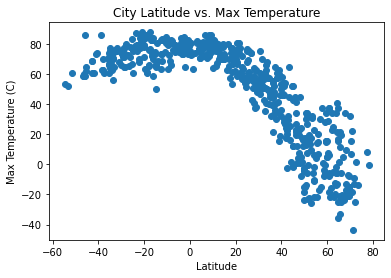

In [65]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.savefig("Figures/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

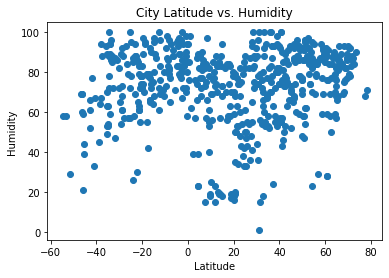

In [66]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Figures/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

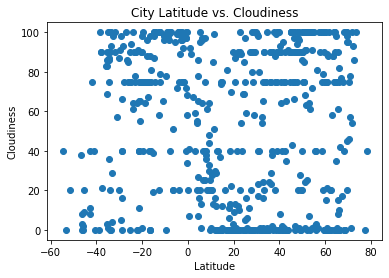

In [67]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Figures/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

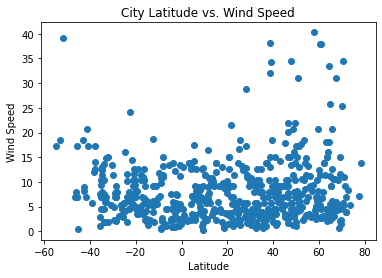

In [68]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [45]:
northern_df = weather_data_df.loc[weather_data_df['Lat'] > 0.0]
southern_df = weather_data_df.loc[weather_data_df['Lat'] < 0.0]

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
3         tianpeng  30.9866  103.9393     54.00         1          80   
4          beterou   9.1992    2.2586     78.31        55          30   
5            adrar  20.5022  -10.0711     67.78        19          13   
7         missoula  47.0166 -113.8009      3.99        60          90   
8          makokou   0.5738   12.8642     72.93        85           7   
..             ...      ...       ...       ...       ...         ...   
569        kumluca  36.3703   30.2869     55.26        70          29   
570     kholmogory  64.2229   41.6560    -13.00        77          75   
574      bonavista  48.6499  -53.1147     24.01        86         100   
575  san cristobal   7.7669  -72.2250     82.40        57          40   
579           male   4.1748   73.5089     80.60        74          20   

     Wind Speed Country  
3          1.86      CN  
4          0.29      BJ  
5          8.97      MR  
7         14.97      US  
8          4.54      GA  
..          ...     ...  
569        2.30      TR  
570        2.24      RU  
574       11.50      CA  
575        6.91      VE  
579       12.66      MV  

[395 rows x 8 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8836718060285639


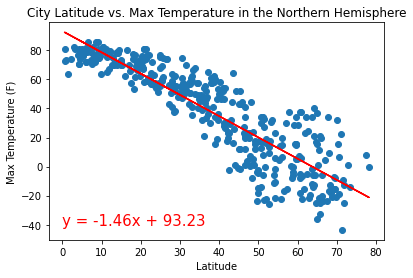

In [69]:
x_axis = northern_df["Lat"]
y_axis = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Figures/fig5.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.49214171813731766


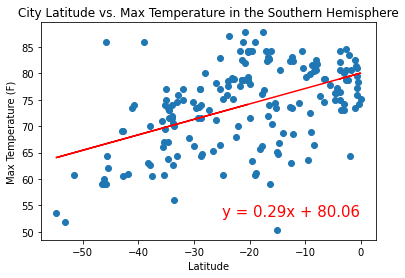

In [70]:
x_axis = southern_df["Lat"]
y_axis = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-25,53),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Figures/fig6.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.31845317097032055


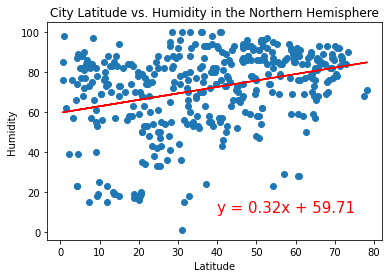

In [71]:
x_axis = northern_df["Lat"]
y_axis = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(40, 10),fontsize=15,color="red")
plt.title("City Latitude vs. Humidity in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Figures/fig7.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.42802094312884115


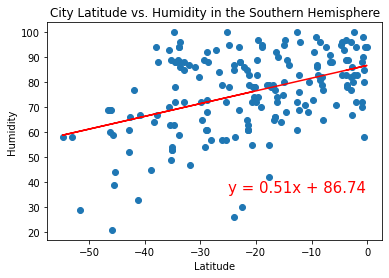

In [72]:
x_axis = southern_df["Lat"]
y_axis = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-25, 36),fontsize=15,color="red")
plt.title("City Latitude vs. Humidity in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Figures/fig8.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19766764229187708


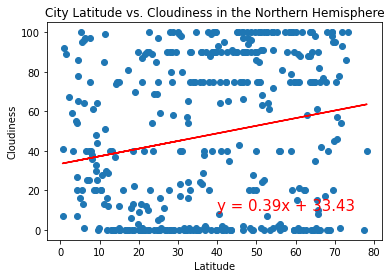

In [73]:
x_axis = northern_df["Lat"]
y_axis = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(40, 10),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Figures/fig9.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3955672967289927


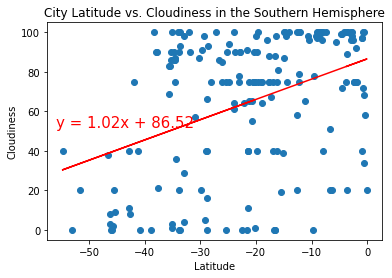

In [86]:
x_axis = southern_df["Lat"]
y_axis = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-56, 52),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Figures/fig10.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15290108388115528


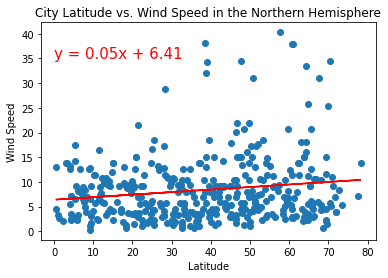

In [84]:
x_axis = northern_df["Lat"]
y_axis = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0, 35),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Figures/fig11.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.36427050838023217


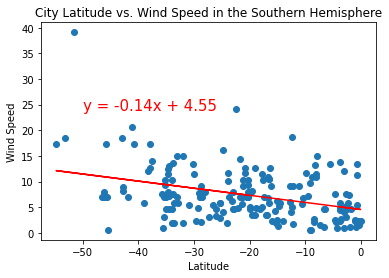

In [85]:
x_axis = southern_df["Lat"]
y_axis = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50, 24),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Figures/fig12.png")
print(f'The r-value is: {rvalue}')
plt.show()